### TCAV 
Exercise following Ch. 8 of "Applied Machine Learning Explainability Techniques" from Packt Publishing.

In [1]:
import tensorflow as tf
import tcav
import os

from tcav import utils
from tcav import utils_plot
from tcav import tcav
from tcav import cav
from tcav import model
from tcav import cav

In [2]:
target = 'tiger'
concepts = ['honeycombed', 'striped']

In [3]:
activation_dir = 'activations/'
cav_directory = 'cavs/'
source_dir = 'images/'

utils.make_dir_if_not_exists(activation_dir)
utils.make_dir_if_not_exists(cav_directory)

In [4]:
alphas = [0.1] # regulariser penalty param for linear classifier

In [7]:
model_to_run = 'GoogleNet'
sess = utils.create_session()

GRAPH_PATH = "models/inception5h/tensorflow_inception_graph.pb"
LABEL_PATH = "models/inception5h/imagenet_comp_graph_label_strings.txt"

trained_model = model.GoogleNetWrapper_public(
    sess,
    GRAPH_PATH,
    LABEL_PATH
)

In [8]:
import tcav.activation_generator as act_gen

In [9]:
act_generator = act_gen.ImageActivationGenerator(trained_model, source_dir, activation_dir, max_examples=100)

## Model Explanability

In [10]:
bottlenecks = [ 'mixed4c'] # define a 'bottleneck' layer

In [11]:
num_random_exp = 15

mytcav = tcav.TCAV(
    sess,
    target,
    concepts,
    bottlenecks,
    act_generator,
    alphas,
    cav_dir = cav_directory,
    num_random_exp = num_random_exp
)

INFO:tensorflow:mixed4c ['honeycombed', 'random500_0'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_1'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_2'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_3'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_4'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_5'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_6'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_7'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_8'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_9'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_10'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_11'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_12'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_13'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_14'] tiger 0.1
INFO:tensorflow:mixe

In [12]:
results = mytcav.run(run_parallel=False)

INFO:tensorflow:running 240 params
INFO:tensorflow:Running param 0 of 240
INFO:tensorflow:running tiger ['honeycombed', 'random500_0']
INFO:tensorflow:activations/acts_honeycombed_mixed4c does not exist, Making one...
INFO:tensorflow:reached end of file
INFO:tensorflow:activations/acts_random500_0_mixed4c does not exist, Making one...
INFO:tensorflow:activations/acts_tiger_mixed4c does not exist, Making one...
INFO:tensorflow:Training CAV ['honeycombed', 'random500_0'] - mixed4c alpha 0.1
INFO:tensorflow:training with alpha=0.1
INFO:tensorflow:acc per class {'honeycombed': 1.0, 'random500_0': 1.0, 'overall': 1.0}
INFO:tensorflow:CAV accuracies: {'honeycombed': 1.0, 'random500_0': 1.0, 'overall': 1.0}
INFO:tensorflow:Running param 1 of 240
INFO:tensorflow:running tiger ['honeycombed', 'random500_1']
INFO:tensorflow:Loaded activations/acts_honeycombed_mixed4c shape (50, 14, 14, 512)
INFO:tensorflow:activations/acts_random500_1_mixed4c does not exist, Making one...
INFO:tensorflow:Loaded 

Class = tiger
  Concept = honeycombed
    Bottleneck = mixed4c. TCAV Score = 0.50 (+- 0.14), random was 0.51 (+- 0.16). p-val = 0.853 (not significant)
  Concept = striped
    Bottleneck = mixed4c. TCAV Score = 0.67 (+- 0.09), random was 0.51 (+- 0.16). p-val = 0.000 (significant)
{'mixed4c': {'bn_vals': [0.01, 0.6666666666666666], 'bn_stds': [0, 0.08737370758427228], 'significant': [False, True]}}


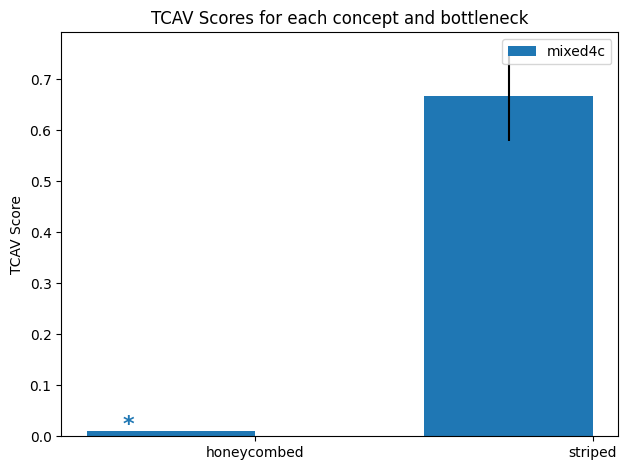

In [13]:
utils_plot.plot_results(results, num_random_exp=num_random_exp)

### Exercise

Can you now use the ImageNet dataset and ascertain the importance of the concept of water to ships and of clouds or sky to airplanes? This will help you understand this concept in more depth and give you more confidence to apply TCAV. Next, we will discuss some advantages and limitations of TCAV.

In [14]:
#TODO flesh out and discuss the pros and cons

#### Pros
- does not present the same issue of contradicting explanations for two data instances, explanation true for whole class.
- more human friendly compared to LIME and SHAP as 'human concepts' are used to anchor explanations.
- more flexibility using concepts as opposed to features as explanations, any introduction of a new feature requires retraining of the model.
- imbalance in the dataset can also be unveiled using this technique.

#### Cons
- limited to neural networks (and arguably deep neural networks).
- prone to data drift, adversarial effects, etc. Ensure that training data inderence data and concept data have similar statistical properties of nois and data impurity issue will impact concepts generated.
- can be expensive and time consuming, especially with existing Python tools. 